In [51]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams['image.cmap'] = "gray"
import mglearn

# **Dimensionality Reduction**
#### Principal Component Analysis (PCA)

### Applying PCA to the cancer dataset for visualization

In [53]:
plt.style.use('dark_background')
plt.style.use('bmh')

In [54]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

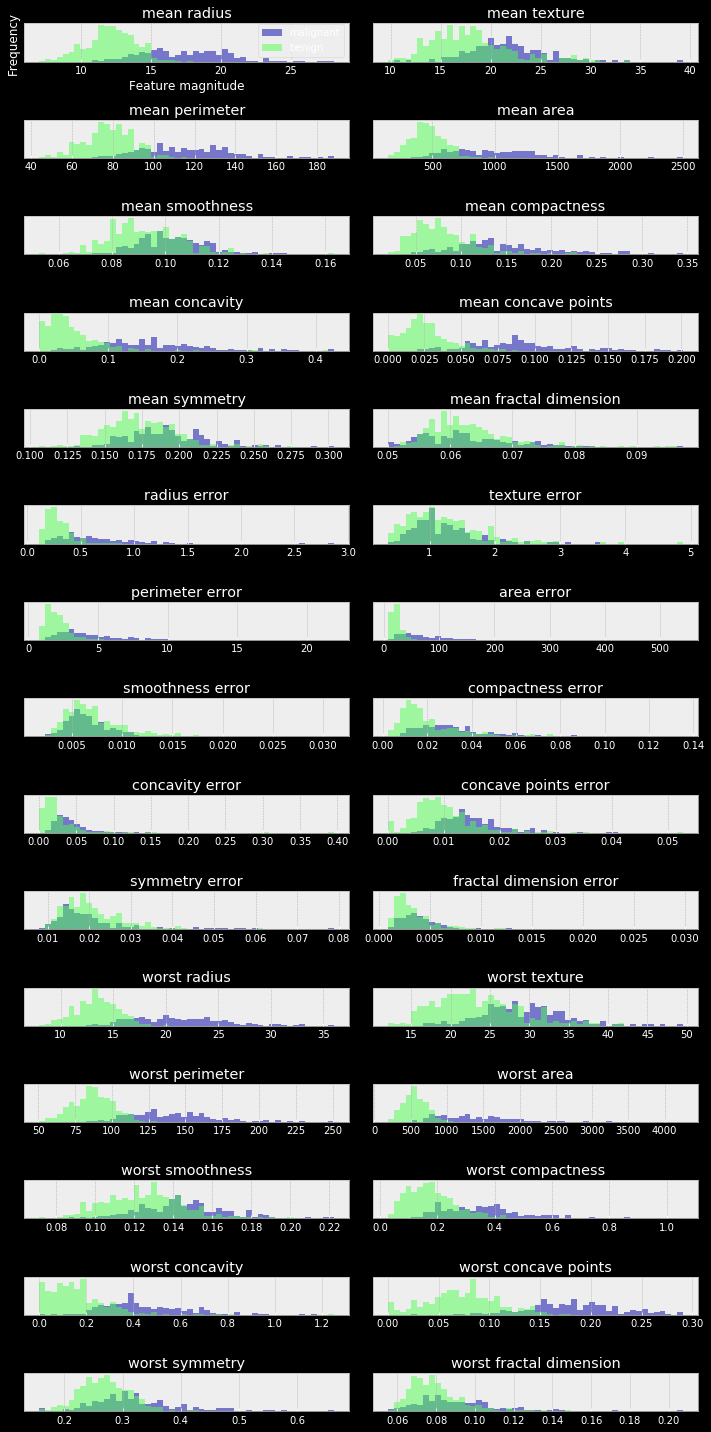

In [55]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

### We want to classify the tumors

- A feature can split 2 classes well if there is a very small overlaping between 2 classes, highest coeffiecient for PCA (ex: 'worst concave points')


- A feature can not split 2 classes well if there is alot of overlapping (ex: 'worst fractal dimension')

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

### `n_components` number of new features 

### `whiten` is another normalization

In [58]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


### We had 30 features at first but now we have only 2 

Text(0, 0.5, 'second principal component')

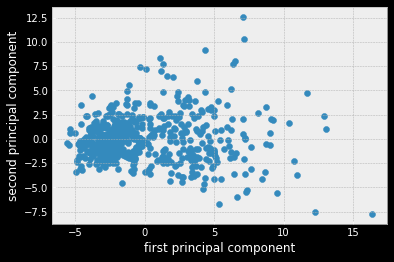

In [59]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("first principal component")
plt.ylabel("second principal component")

Text(0, 0.5, 'second principal component')

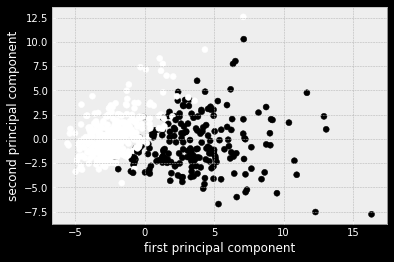

In [60]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer.target)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

### By using 2 components these 2 classes are easy seperatable

Text(0, 0.5, 'Second principal component')

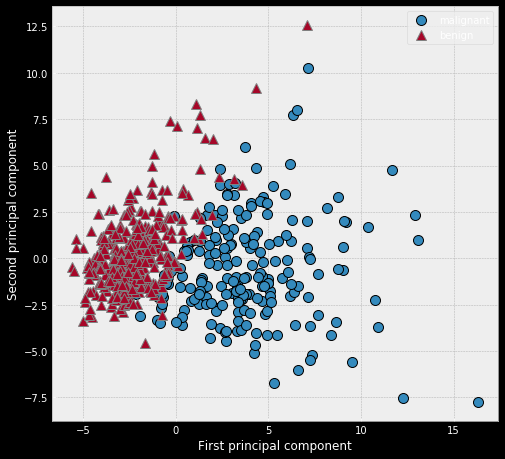

In [61]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [62]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [63]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


### For each obesrvation, we multiply all values in `X` by corresponding coefficients in `pca.components_` and sum them together to find new feautures value

In [64]:
X_scaled[0]

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

In [86]:
pca.components_[0].shape, X_scaled[0].shape

((30,), (30,))

In [84]:
print( pca.components_[0]@X_scaled[0], pca.components_[1]@X_scaled[0])
X_pca[0]

9.192836826213238 1.9485830707839495


array([9.19283683, 1.94858307])

In [70]:
print( pca.components_[0]@X_scaled[1], pca.components_[1]@X_scaled[1] )
X_pca[1]

2.387801795802216 -3.7681717420682093


array([ 2.3878018 , -3.76817174])

X_rec = X_pca @ pca.components_ 
X_rec[0]

In [79]:
X_scaled[0]

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

Text(0, 0.5, 'Principal components')

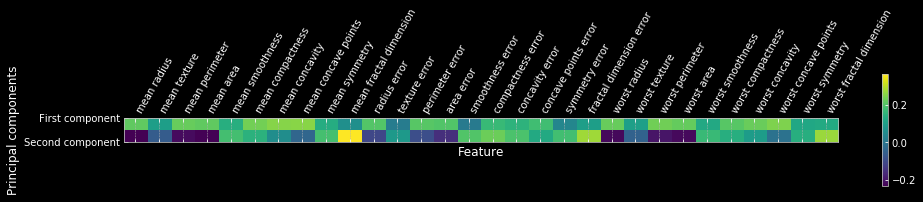

In [17]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

### The plot above shows how each feature contribute to the new features

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

### Let's train a model without scaling

In [20]:
lr = LogisticRegression(C=10000, max_iter=2000).fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9835680751173709
0.9370629370629371


C:\Users\Behnam\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Now we train the model after scaling and PCA

In [21]:
from sklearn.pipeline import make_pipeline
pca_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(C=10000))
pca_lr.fit(X_train, y_train)
print(pca_lr.score(X_train, y_train))
print(pca_lr.score(X_test, y_test))

0.960093896713615
0.9230769230769231


### With 2 components the result is not as good but it's much farster.


### Let's try more components
- 6 components

In [22]:
pca_lr = make_pipeline(StandardScaler(), PCA(n_components=6), LogisticRegression(C=10000))
pca_lr.fit(X_train, y_train)
print(pca_lr.score(X_train, y_train))
print(pca_lr.score(X_test, y_test))

0.9812206572769953
0.958041958041958


### It's even better than original data because we have removed some of redundant features

In [23]:
X_train.shape

(426, 30)

### Let's see how much variance we've captured with the 2 features PCA (eigenvalues) $\lambda$

In [24]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

### The first feature captured: `0.44272026`
### The second feature captured: `0.18971182`
### In total `0.63` = 63 %
### At leat we need to capture 90%

In [25]:
pca.explained_variance_ratio_.shape

(2,)

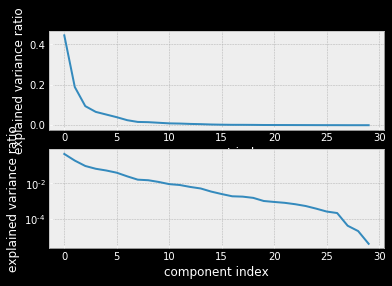

In [26]:
pca_scaled = make_pipeline(StandardScaler(), PCA())
pca_scaled.fit(X_train, y_train)
pca = pca_scaled.named_steps['pca']

fig, axes = plt.subplots(2)
axes[0].plot(pca.explained_variance_ratio_)
axes[1].semilogy(pca.explained_variance_ratio_)
for ax in axes:
    ax.set_xlabel("component index")
    ax.set_ylabel("explained variance ratio")

### We want to choose component number so that the varinace ratio would be greater that 90%

- As you can see, after 6 componenets the varinace ratio wont chaneg alot.

# **Eigenfaces for feature extraction**

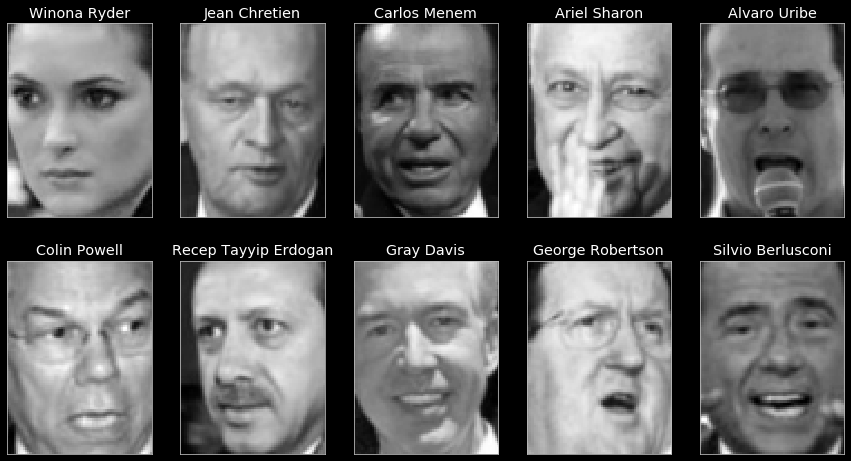

In [27]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [28]:
image_shape

(87, 65)

### Each image is (87, 65) equals to 5655 features

In [29]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [30]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [31]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
X_people = X_people / 255.

In [32]:
X_people.shape
print("X_people.shape: {}".format(X_people.shape))

X_people.shape: (2063, 5655)


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# split the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier with using one neighbor:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


### `whitening()` normalize the data

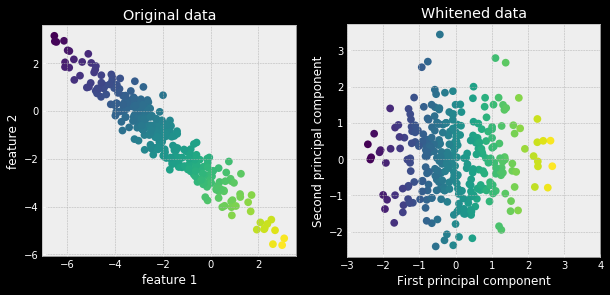

In [34]:
mglearn.plots.plot_pca_whitening()

### Setting `whiten=True` and `n_components=100`

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


### The number of features in X has reduced from 5655 to 100

In [36]:
pca.components_.shape

(100, 5655)

### We have 100 new features and each of these features has 5655 coefficients

### `n_neighbors=1` is the most complicated version of KNN

In [37]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


In [38]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


In [39]:
image_shape

(87, 65)

### We have 100 new features that each has 5655 coefficients
- To print these new features, we reshape them to 100 images of 5655 pixels(57x65)

- We print only 15 of them but there are 100 of them (eigenfaces)

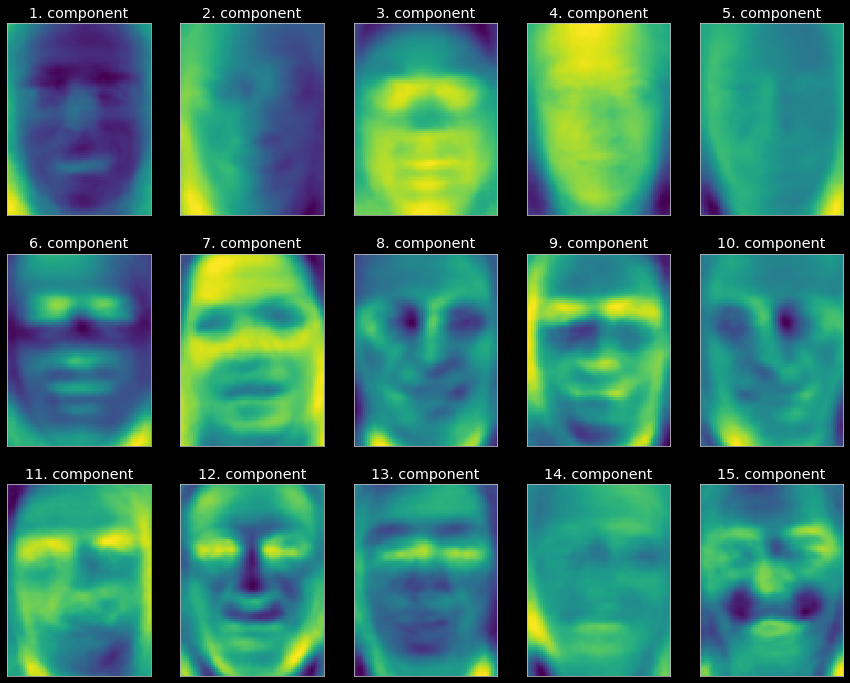

In [40]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

### These are the most important eigenfaces in orderly manner

- The first image has the highest coeffiecents and is the most importatnt face 

## We can create all the faces in train data, with these new components *(eigenfaces)*

- each original image is a linear combination of these eigenfaces because each original feature is a linear combination of new features

- Igenfaces are the new features

In [41]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

"""
image_shape = people.images[0].shape
plt.figure(figsize=(20, 3))
ax = plt.gca()

imagebox = OffsetImage(people.images[0], zoom=7, cmap="gray")
ab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords='data')
ax.add_artist(ab)

for i in range(4):
    imagebox = OffsetImage(pca.components_[i].reshape(image_shape), zoom=7,
                           cmap="viridis")

    ab = AnnotationBbox(imagebox, (.3 + .2 * i, 0.4),
                        pad=0.0,
                        xycoords='data'
                        )
    ax.add_artist(ab)
    if i == 0:
        plt.text(.18, .25, 'x_{} *'.format(i), fontdict={'fontsize': 50})
    else:
        plt.text(.15 + .2 * i, .25, '+ x_{} *'.format(i),
                 fontdict={'fontsize': 50})

plt.text(.95, .25, '+ ...', fontdict={'fontsize': 50})

plt.text(.13, .3, r'\approx', fontdict={'fontsize': 50})
plt.axis("off")
plt.savefig("images/03-face_decomposition.png")
plt.close()
"""

'\nimage_shape = people.images[0].shape\nplt.figure(figsize=(20, 3))\nax = plt.gca()\n\nimagebox = OffsetImage(people.images[0], zoom=7, cmap="gray")\nab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords=\'data\')\nax.add_artist(ab)\n\nfor i in range(4):\n    imagebox = OffsetImage(pca.components_[i].reshape(image_shape), zoom=7,\n                           cmap="viridis")\n\n    ab = AnnotationBbox(imagebox, (.3 + .2 * i, 0.4),\n                        pad=0.0,\n                        xycoords=\'data\'\n                        )\n    ax.add_artist(ab)\n    if i == 0:\n        plt.text(.18, .25, \'x_{} *\'.format(i), fontdict={\'fontsize\': 50})\n    else:\n        plt.text(.15 + .2 * i, .25, \'+ x_{} *\'.format(i),\n                 fontdict={\'fontsize\': 50})\n\nplt.text(.95, .25, \'+ ...\', fontdict={\'fontsize\': 50})\n\nplt.text(.13, .3, r\'\x07pprox\', fontdict={\'fontsize\': 50})\nplt.axis("off")\nplt.savefig("images/03-face_decomposition.png")\nplt.close()\n'

![decomposition](03-face_decomposition.png)

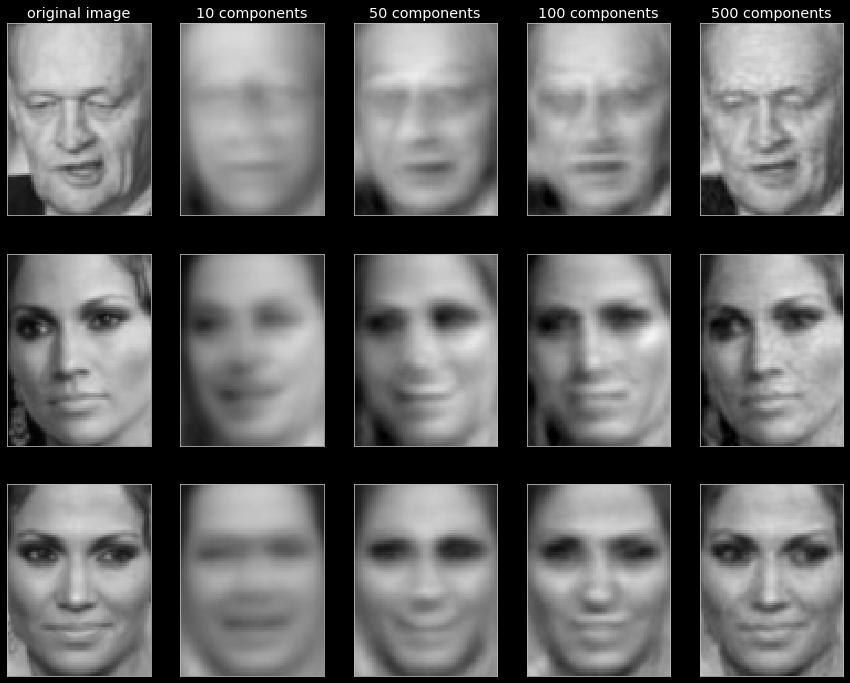

In [42]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

### As you can see, with more componenets we can capture more details

# **Non-Negative Matrix Factorization (NMF)**

- All coeffiecients are positive

- easier to interpret

### Applying NMF to face images

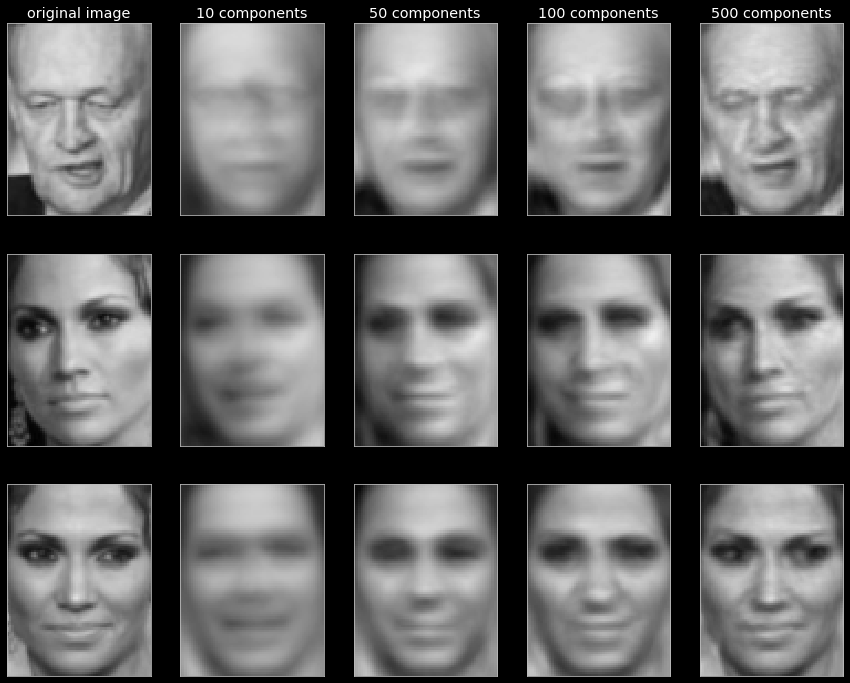

In [43]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

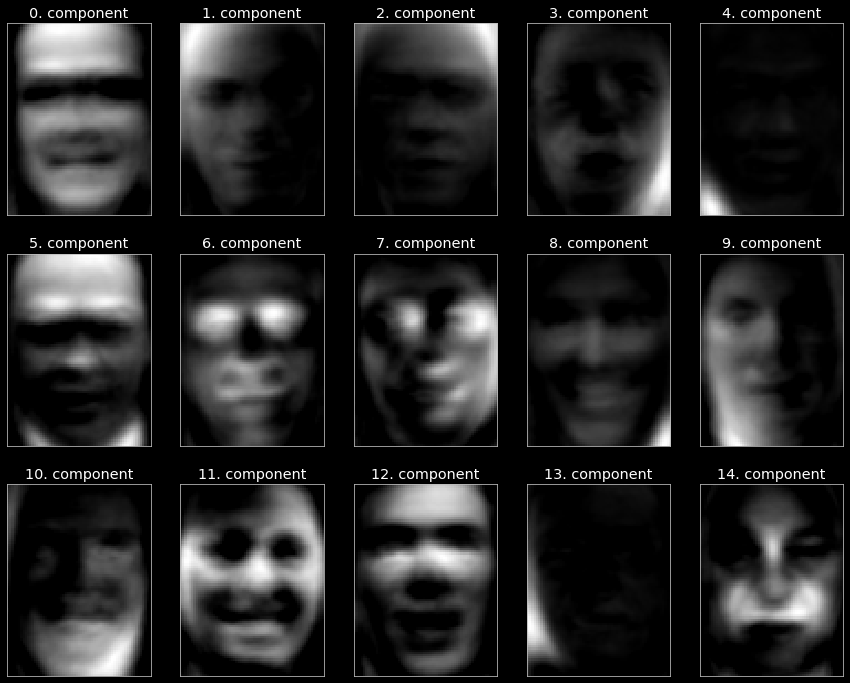

In [44]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

### 15 eigenfaces  created by NMF 
- Unlike PCA, here all original features are a positive combination of these new fetures

In [45]:
X_train_nmf.shape

(1547, 15)

In [46]:
nmf.components_.shape

(15, 5655)

### We converted 5655 features into 15
- Each of these 15 new features, has 5655 coefficents

- To print these 15 new features, we reshape them to 15 images of 5655 pixels(57x65)

### Let's print the images with highest value for component 7

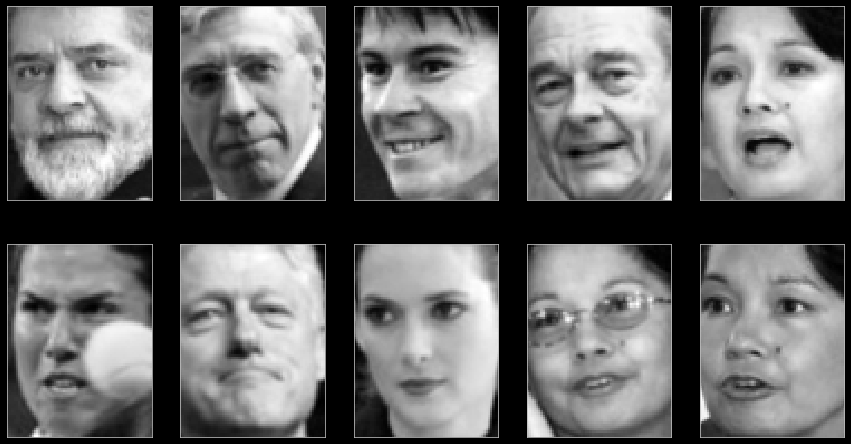

In [47]:
compn = 7
# sort by 7th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig.suptitle("Large component 7")
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

### AS YOU can see theye are tilted to the left

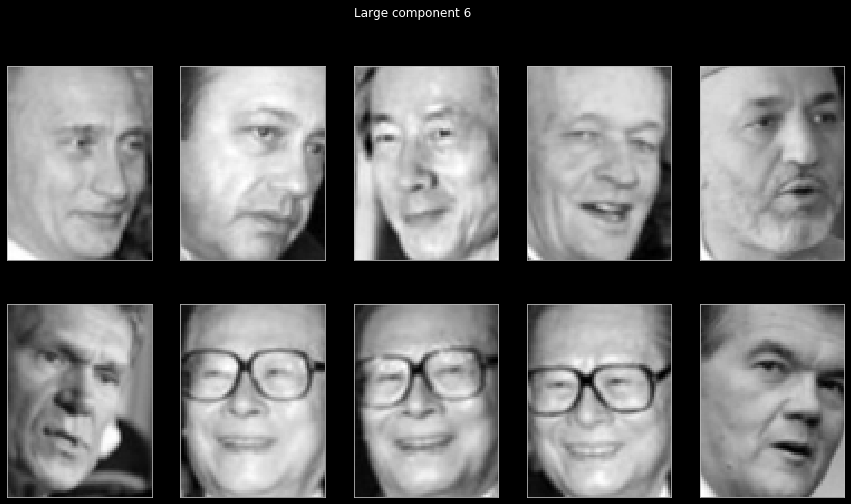

In [48]:
compn = 6
# sort by 6th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 6")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

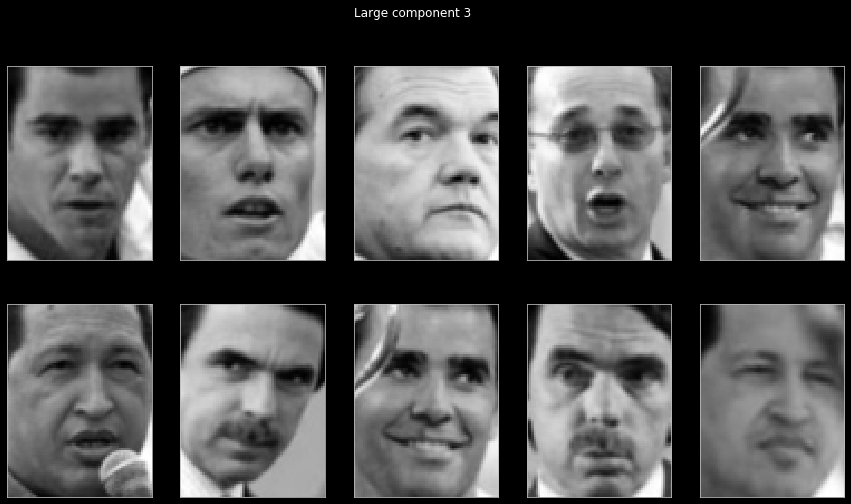

In [49]:
compn = 3
# sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))